In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('Zip_MHINC_Pop.csv')

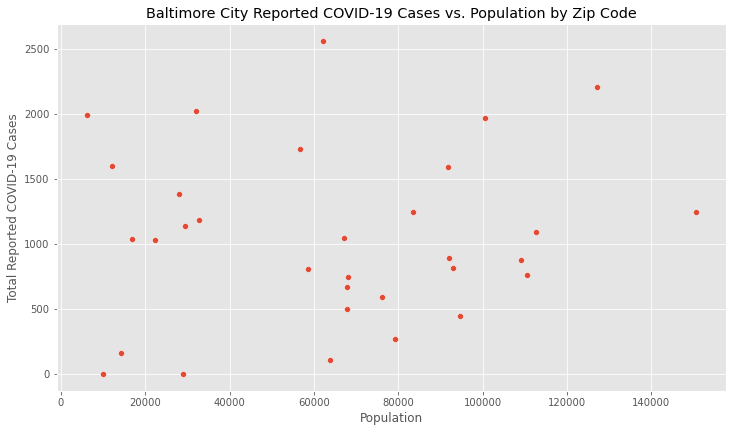

[[1.         0.09147587]
 [0.09147587 1.        ]]


In [5]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=df,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.show()

corr = np.corrcoef(df[['Pop2010','TotalCases']],rowvar=False)
print(corr)

In [35]:
labelList = []

for index, row in df.iterrows():
    if row['Pop2010'] > 65000:
        labelList.append('HighPop')
    else:
        labelList.append('LowPop')
        
df['classLabel'] = labelList

X_train, X_test, y_train, y_test = \
    train_test_split(df[['Pop2010','TotalCases']],\
                     df['classLabel'],test_size=0.5,\
                         random_state=21,stratify=df['classLabel'])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print('\n')
print(y_pred)
score = knn.score(X_test,y_test)
print('\n')
print(score)
print('\n')



['LowPop' 'LowPop' 'LowPop' 'LowPop' 'LowPop' 'HighPop' 'HighPop' 'LowPop'
 'LowPop' 'LowPop' 'LowPop' 'LowPop' 'LowPop' 'LowPop' 'HighPop' 'HighPop']


0.75




In [36]:
print(df)

    Unnamed: 0 Zip Code         MHINC  Pop2010  TotalCases classLabel
0            0    21201  48044.111111    94655         447    HighPop
1            1    21202  53117.988889    92987         813    HighPop
2            2    21205  38678.157143    67771         668    HighPop
3            3    21206  53439.028571   100449        1969    HighPop
4            4    21207  47495.616667    56773        1729     LowPop
5            5    21208  49056.350000    27948        1384     LowPop
6            6    21209  64002.133333    68067         746    HighPop
7            7    21210  82454.580000    63788         110     LowPop
8            8    21211  56940.450000    79128         269    HighPop
9            9    21212  73300.960000    58589         806     LowPop
10          10    21213  38321.400000   112681        1089    HighPop
11          11    21214  59342.820000    76173         593    HighPop
12          12    21215  47794.718182   127102        2207    HighPop
13          13    21